<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1**

* Home Credit is a credit card company. it strives to make a broad/balanced approach for the unbanked population by providing a safe and positiveexperience for its customers.
In order to make sure people have a safe experience, they use a variety of alternative data to predict their clients repayment ability.

* The competition is to predict from the datset provided whether a client will repay their credit card balance or not.

* from this, companies can predict a client's payment ability.

## **Problem 2**

In [3]:
#Overview of the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

application_train = "/content/application_train.csv"
df = pd.read_csv(application_train)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,106764,0,Cash loans,F,N,Y,0,112050.0,450000.0,22977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5785,106765,0,Cash loans,F,N,Y,2,63000.0,112068.0,12199.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5786,106766,0,Cash loans,M,Y,N,0,270000.0,1350000.0,35743.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5787,106767,0,Cash loans,F,N,N,0,67500.0,153504.0,15084.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  from the head, we can see that there are 122 columns, the target variable is zero and one. for the first 5 varibles, only one client has a revolving loan contract type and there are a few missing values.

In [ ]:
# Getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 9.0+ MB


the data set has 52406 entries for the Range Index. the memory usage is 186.1MB. The data types of the variables are as follows: float64(104), int64(2), object(16)

In [38]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,9692.000000,9692.000000,9692.000000,9.692000e+03,9.692000e+03,9692.000000,9.685000e+03,9692.000000,9691.000000,9691.000000,...,9691.000000,9691.000000,9691.000000,9691.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,105652.346574,0.077899,0.415600,1.676262e+05,6.013997e+05,27100.230396,5.410311e+05,0.020931,-16029.072129,62808.813435,...,0.007017,0.000413,0.000516,0.000310,0.007402,0.008118,0.033190,0.276624,0.268983,1.888968
std,3256.587947,0.268027,0.718289,9.466657e+04,4.040238e+05,14419.822666,3.714979e+05,0.013922,4342.680723,140461.490262,...,0.083476,0.020313,0.022710,0.017593,0.088464,0.118421,0.194483,0.932214,0.614159,1.862072
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000000,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102827.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16434.000000,2.385000e+05,0.010006,-19605.000000,-2822.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105665.500000,0.000000,0.000000,1.440000e+05,5.123925e+05,24970.500000,4.500000e+05,0.018850,-15782.000000,-1229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,108462.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34671.375000,6.840000e+05,0.028663,-12401.000000,-293.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,111275.000000,1.000000,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


the describe function shows the summary of the numerical variables. for the categorical variables, it shows the mean, std, min, max, 1st quantile, 3rd quantile and number of unique values.

In [ ]:
df_null =df.isnull().sum()
df_null = df_null.rename('count').reset_index()
df_null

,index,count
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,26972
118,AMT_REQ_CREDIT_BUREAU_WEEK,26972
119,AMT_REQ_CREDIT_BUREAU_MON,26972
120,AMT_REQ_CREDIT_BUREAU_QRT,26972


<Axes: >

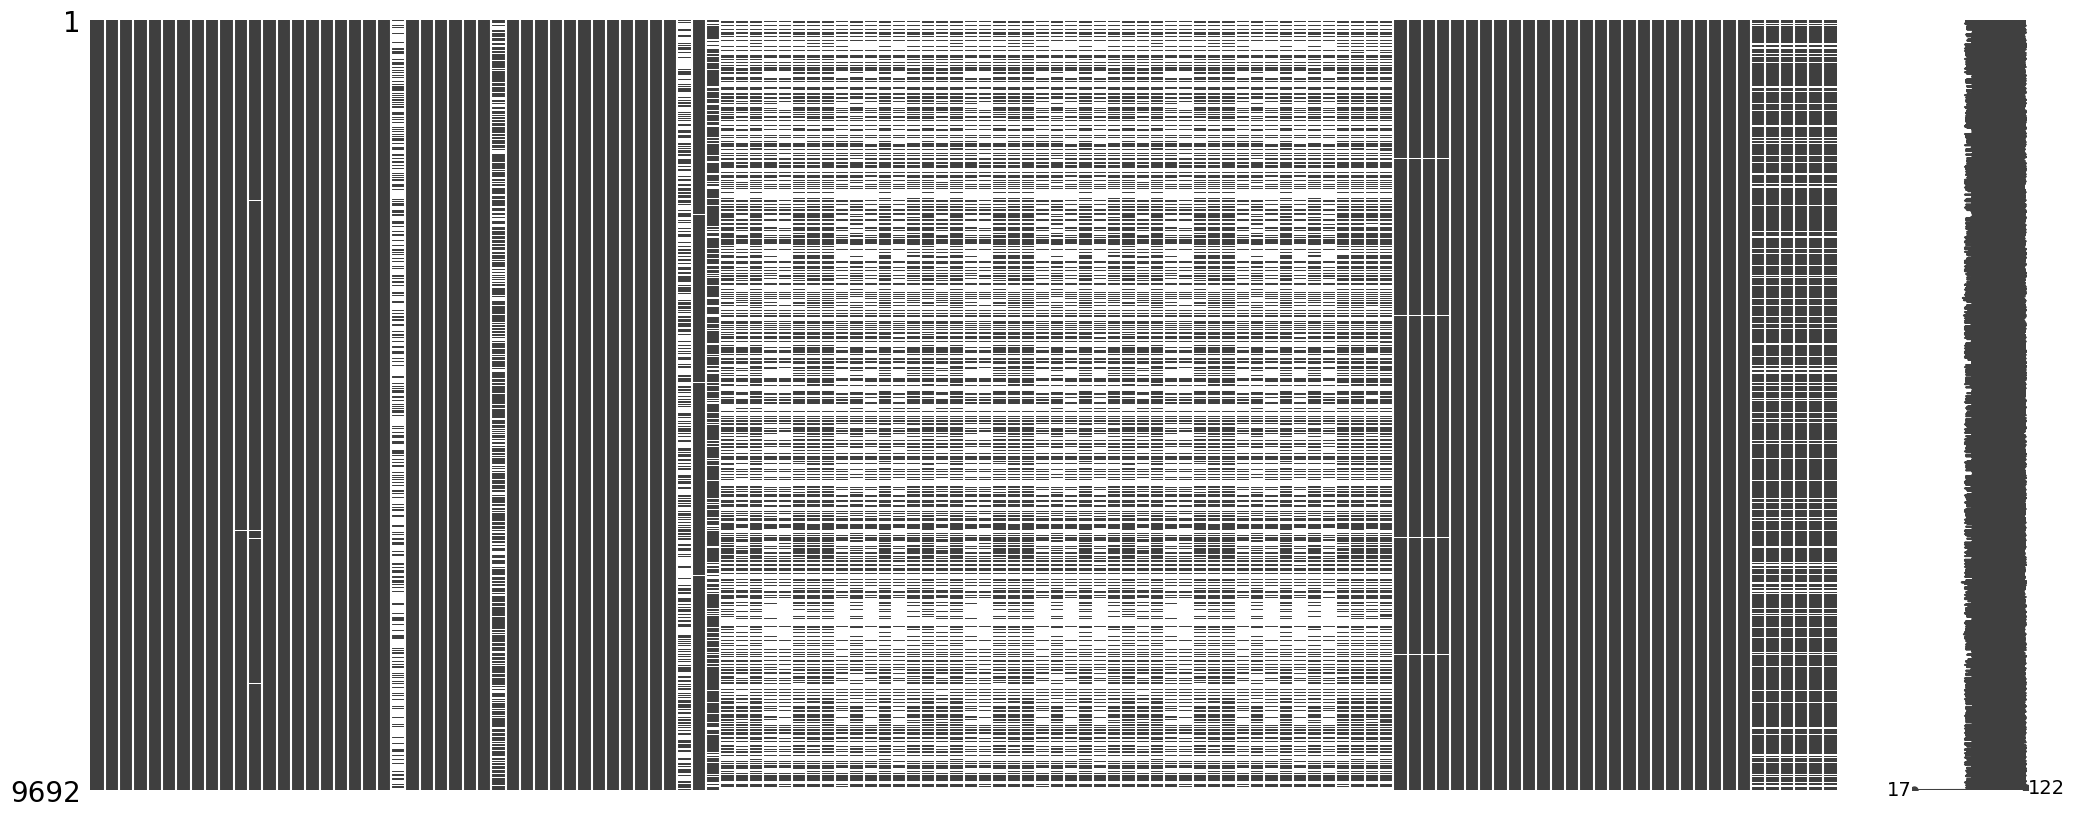

In [ ]:
msno.matrix(df)

<Axes: >

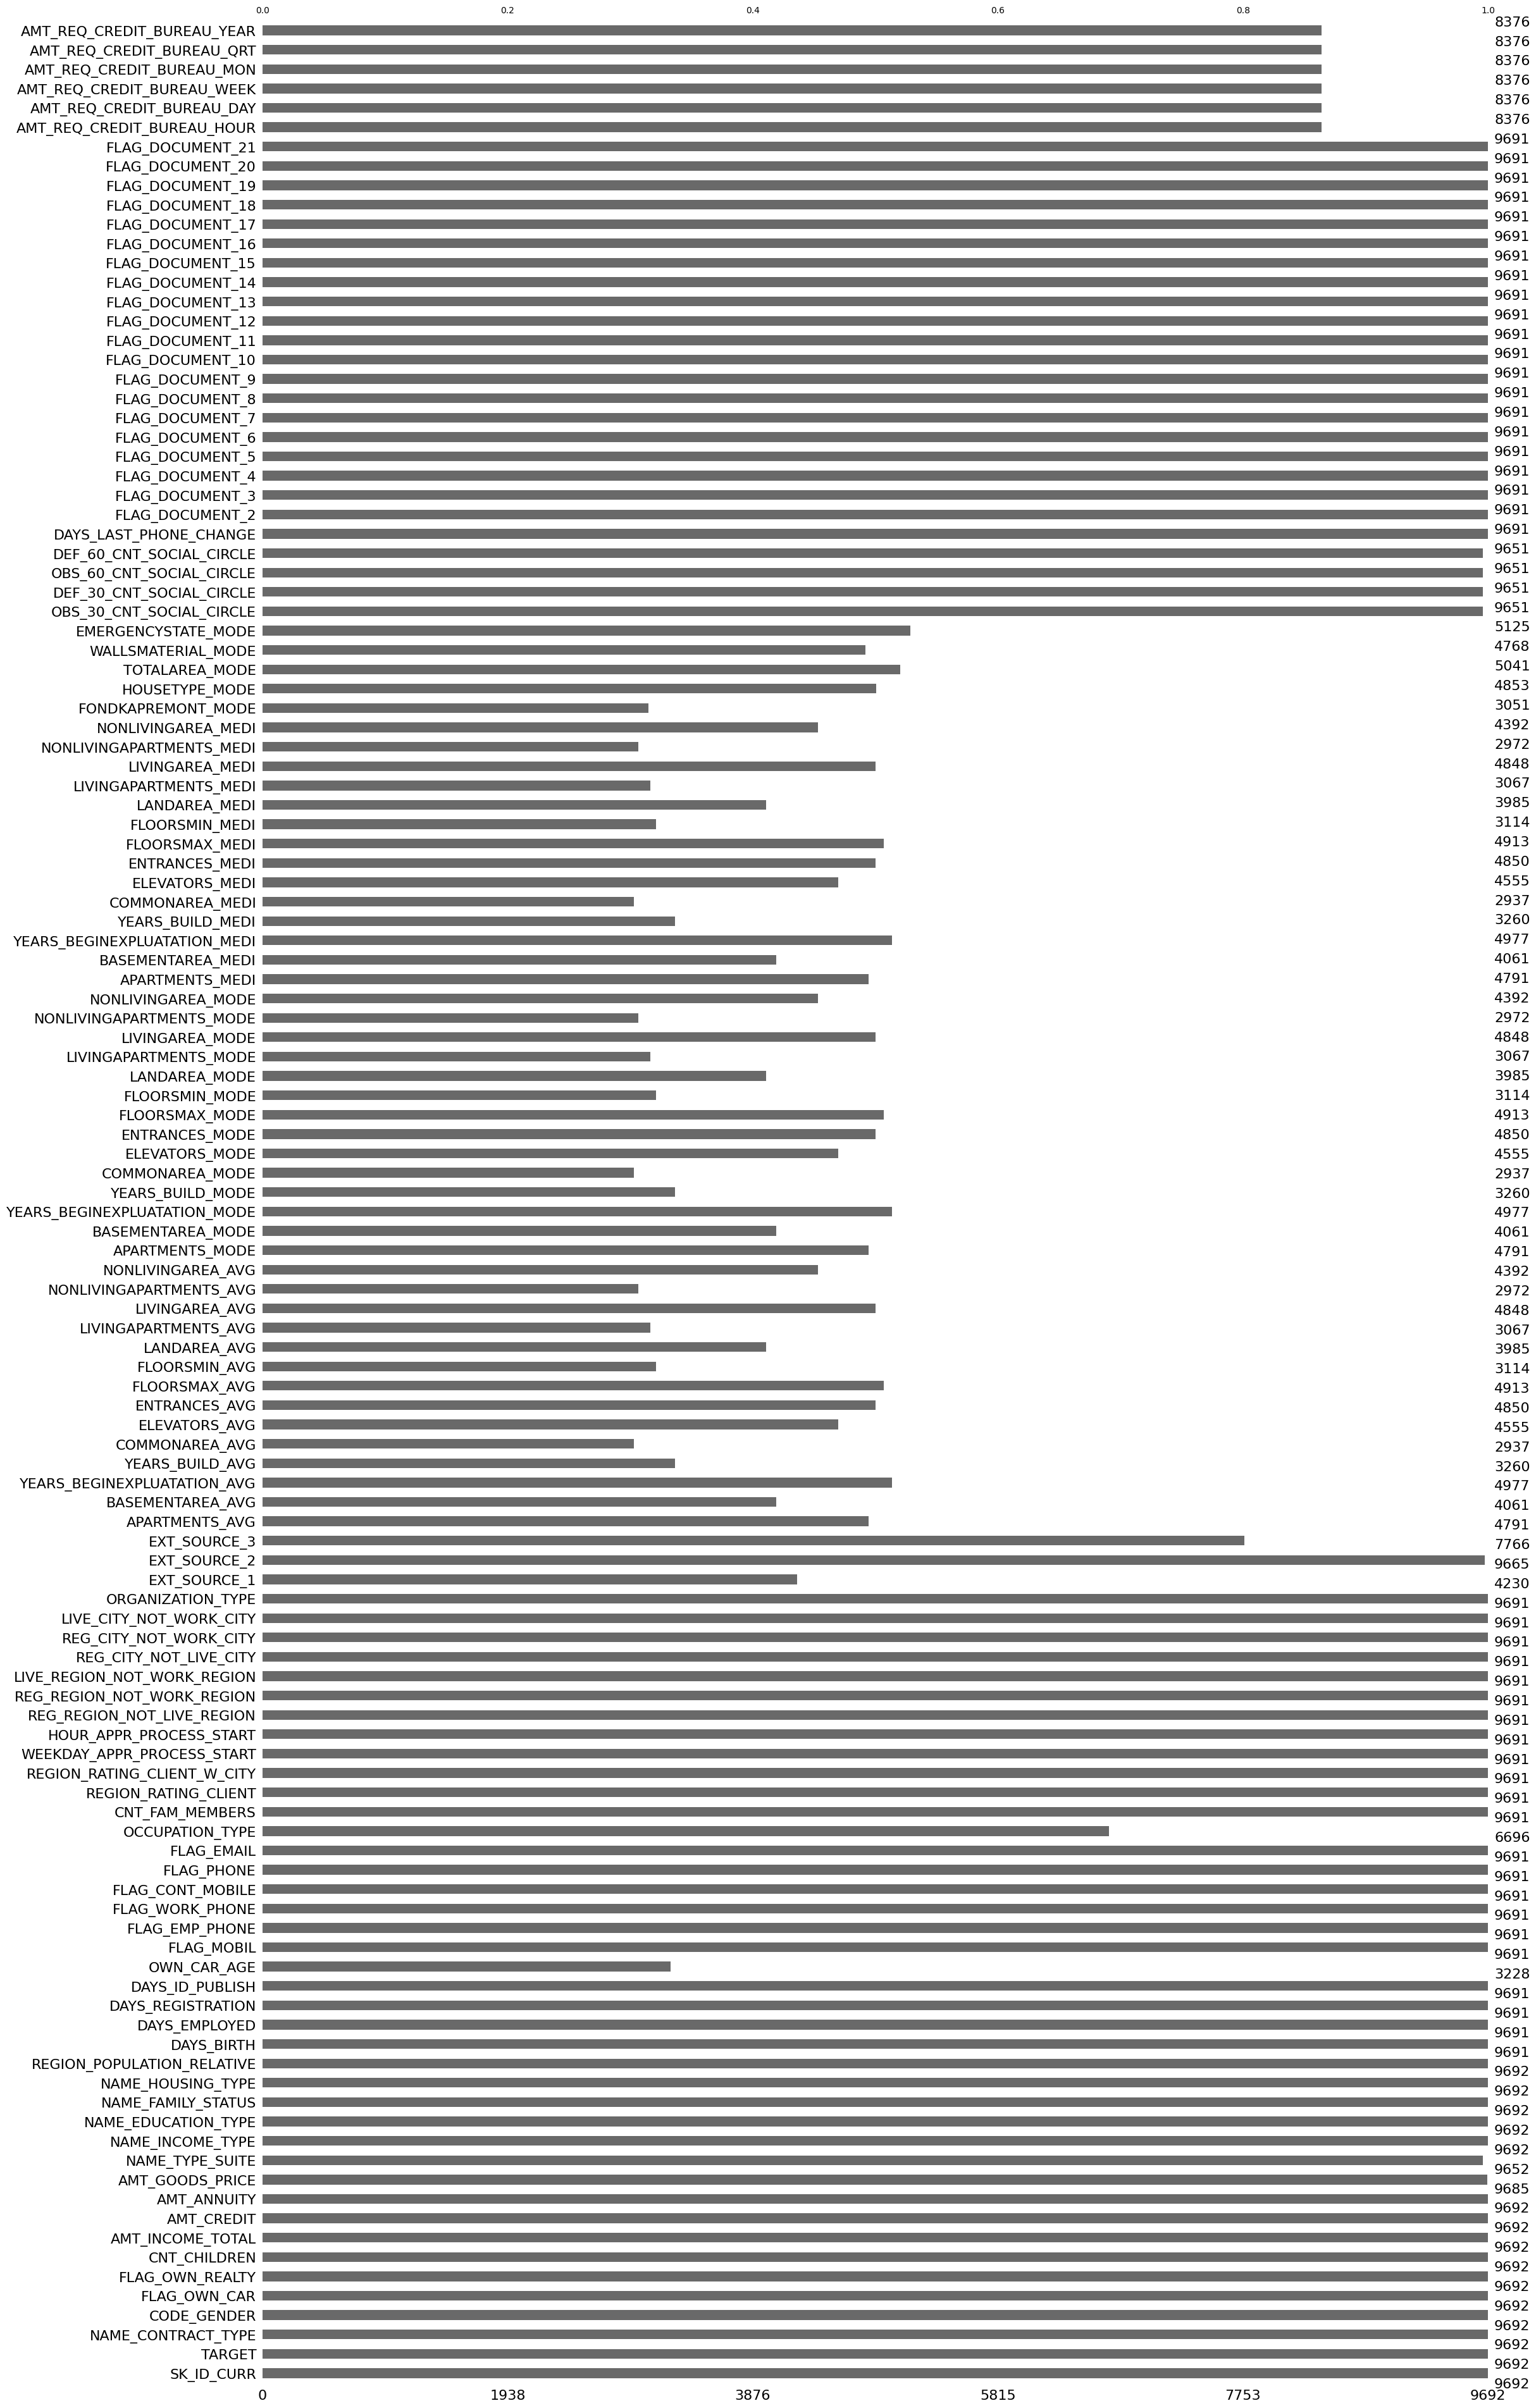

In [ ]:
msno.bar(df)

In [6]:
df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1584
AMT_REQ_CREDIT_BUREAU_WEEK    1584
AMT_REQ_CREDIT_BUREAU_MON     1584
AMT_REQ_CREDIT_BUREAU_QRT     1584
AMT_REQ_CREDIT_BUREAU_YEAR    1584
Length: 122, dtype: int64

In [ ]:
#Drawing the percentage of classes
threshold = 0
df_missing = df.isnull().sum()
df_mising = df_missing[df_missing > threshold]
df_new = df.isnull().sum() / len(df) * 100
df_combine = pd.concat([df_missing, df_new], axis=1, keys=['Total', 'Percentage of class '])
df_combine

,Total,Percentage of class
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,3634,13.377015
AMT_REQ_CREDIT_BUREAU_WEEK,3634,13.377015
AMT_REQ_CREDIT_BUREAU_MON,3634,13.377015
AMT_REQ_CREDIT_BUREAU_QRT,3635,13.380696


In [ ]:
#Percentage of missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [ ]:
threshold = 20
df_percent = df_combine.query("Total >= {}". format(threshold )).index
print("List of features with missing values greater than a threshold of {}. \n{}".format(threshold, df_percent))

List of features with missing values greater than a threshold of 20. 
Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI'

The number of missing values is too high and dropping the null values will negatively affect the performance of the model. The reasons for the missing values maybe as a result of the data collection.

## **Problem 3**

## **Data exploration**

Question 1: what is the distribution of customers that want cash loans and Revolving loans?

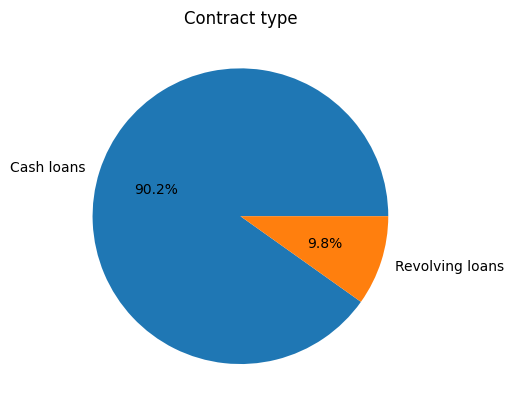

In [14]:
#using pie chart
label = df['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(label, labels = label.index, autopct='%1.1f%%')
plt.title('Contract type')
plt.show()

A larger portion of the customers prefer cash loans. this could mean that most of the customers are self employed.

Question 2: 	How does education level vary among different occupation types?

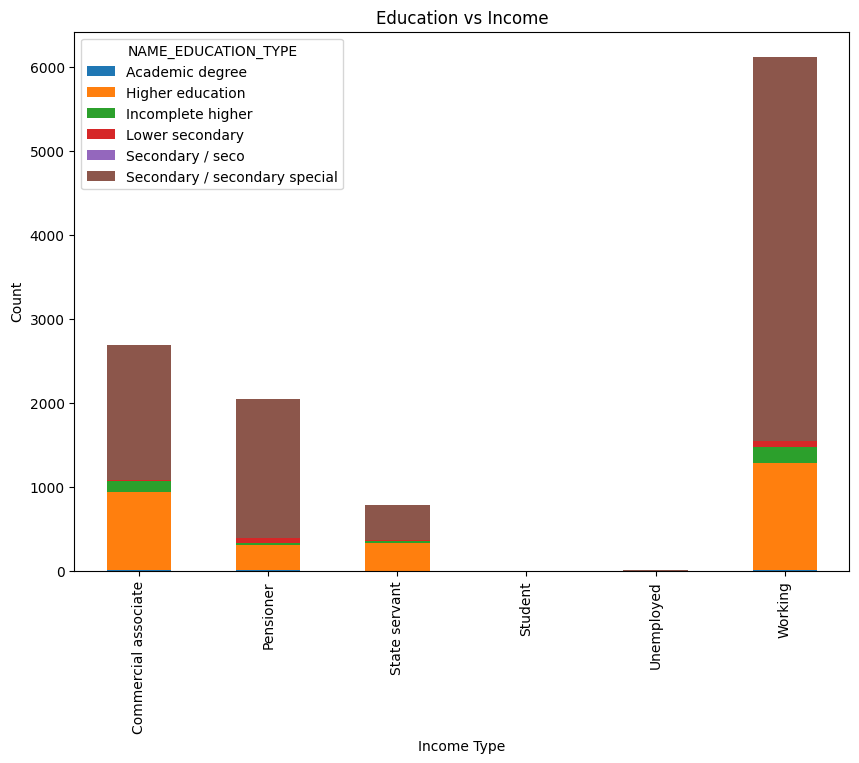

In [26]:
# First, create a cross-tabulation of the two variables
cross_tab = pd.crosstab(df['NAME_INCOME_TYPE'], df['NAME_EDUCATION_TYPE'])

# Then, create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Education vs Income')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()


Insights: there is no correlation between education level and income as most of the customers with a higher income are High School graduates.

Question 3: 	How does the distribution of customers differ based on their marital status?

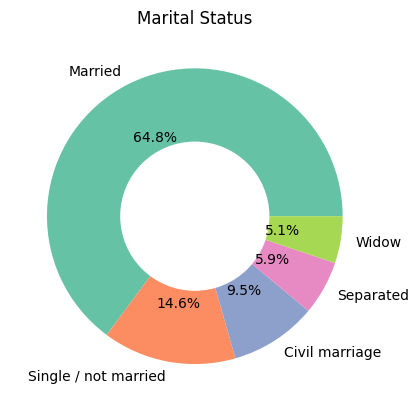

In [36]:
plt.pie(df['NAME_FAMILY_STATUS'].value_counts().values, labels = df['NAME_FAMILY_STATUS'].value_counts().index, autopct='%1.1f%%', colors = sns.color_palette("Set2"))
my_circle = plt.Circle((0,0), 0.5, color = 'white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()


There is a significant difference in the distribution of customers based on their marital status. the number of customers with a married status is higher than the number of customers with a single status.

Does the annuity variable affect the amount required for credit bureau in years?

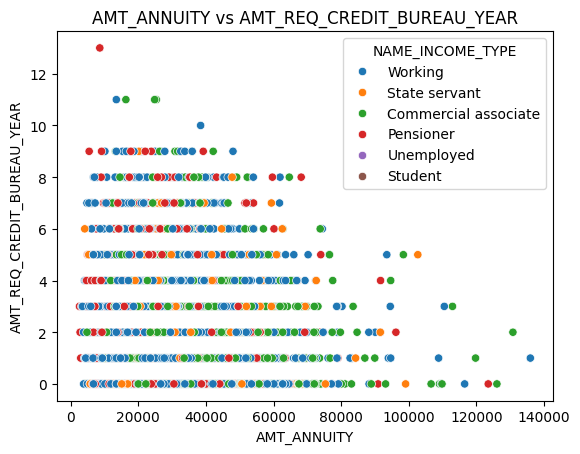

In [40]:
sns.scatterplot(x = df["AMT_ANNUITY"], y = df["AMT_REQ_CREDIT_BUREAU_YEAR"],  hue=df["NAME_INCOME_TYPE"],color = "green")
plt.title("AMT_ANNUITY vs AMT_REQ_CREDIT_BUREAU_YEAR")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_REQ_CREDIT_BUREAU_YEAR")
plt.show()

* The scatter plot shows the relationship between “AMT_ANNUITY” and “AMT_REQ_CREDIT_BUREAU_YEAR”, categorized by “NAME_INCOME_TYPE”.
* Most data points are clustered between 0 and 2 on the y-axis, indicating that most individuals have requested credit bureau information up to two times in the past year regardless of their income type.
* There is no clear pattern or correlation visible between “AMT_ANNUITY” and “AMT_REQ_CREDIT_BUREAU_YEAR”. This suggests that the amount of annuity does not significantly influence the number of enquiries made by the client about their credit in the Bureau.
* The different colors and shapes represent different income types. However, it’s hard to discern any clear trends or differences between these groups from the scatter plot.

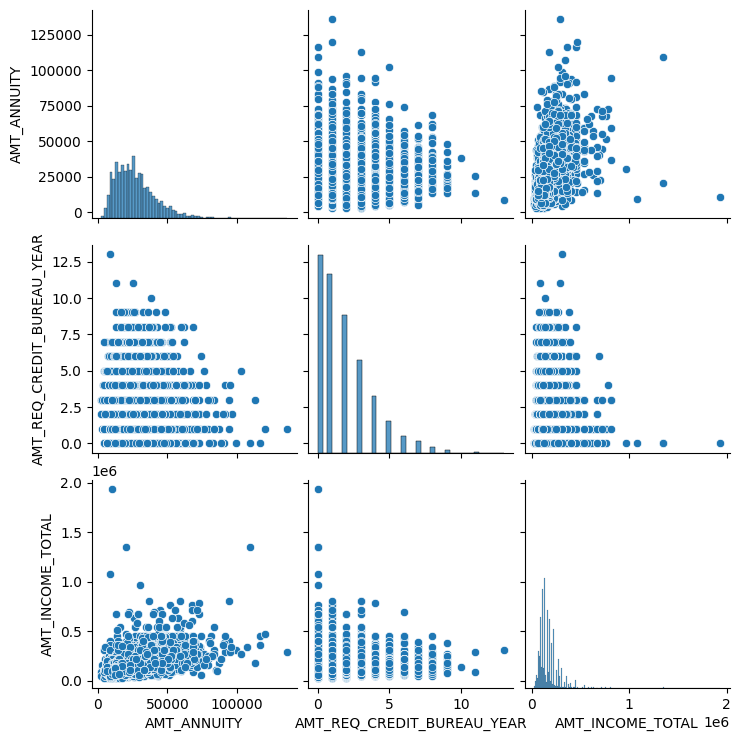

In [9]:
vars_to_plot = ["AMT_ANNUITY", "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_INCOME_TOTAL"]
sns.pairplot(df[vars_to_plot])
plt.show()

the visualization shows that the amount of annuity and the amount required for credit bureau in years are positively correlated. the total income is negatively correlated with the amount of annuity.

the skewness = 1.21    the kurtosis = 1.45 


<ipython-input-5-7534c5a08dfd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AMT_REQ_CREDIT_BUREAU_YEAR"], kde = False, rug = False, bins = 10)


<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

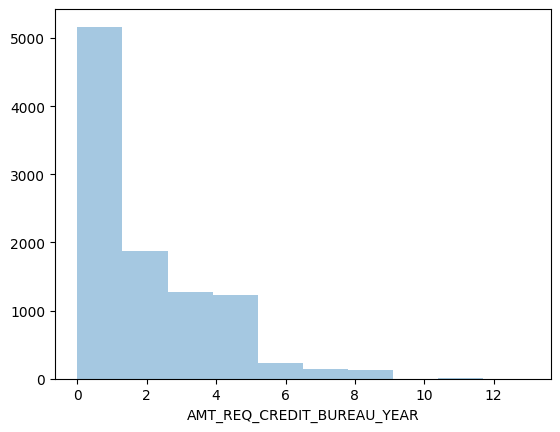

In [5]:
#drawing a graph of the dataset
import seaborn as sns
"--- objective varaible is the same as target variable ---"
a = df["AMT_REQ_CREDIT_BUREAU_YEAR"].skew()
b = df["AMT_REQ_CREDIT_BUREAU_YEAR"].kurt()
print("the skewness = {:.2f}    the kurtosis = {:.2f} ".format(a, b))
sns.distplot(df["AMT_REQ_CREDIT_BUREAU_YEAR"], kde = False, rug = False, bins = 10)

Insight: The amount required for credit bureau in years is normally distributed

How does the price of the goods affect the amount required for credit bureau in years?

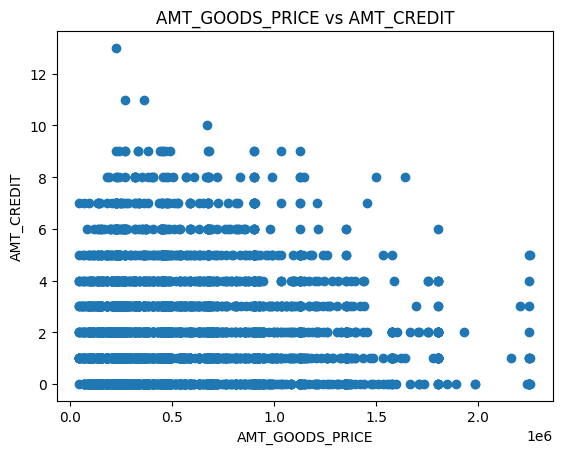

In [19]:
plt.scatter(df['AMT_GOODS_PRICE'], df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.show()


the scatter plot shows that the price of the goods is positively correlated with the amount required for credit bureau in years.